In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import scipy.stats as sps
plt.style.use('ggplot')
from sympy import *
import copy
from gausReg import GaussianProcessRegression
from matplotlib import cm
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error, accuracy_score 
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from myDT import DecisionTree
from sklearn.model_selection import cross_val_score
from joblib import Parallel, delayed
import multiprocessing
from sklearn.model_selection import GridSearchCV
%matplotlib inline
def scan_from_csv(filename):
    return pd.read_csv(filename,na_values='None')

def write_answer_to_file(answer,file):
    with open(file, 'w') as answer_file:  
        answer_file.write(answer)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
Train = scan_from_csv('train.tsv')
Test = scan_from_csv('test.tsv')

In [4]:
Train.shape, Test.shape

((72457, 66), (2016, 65))

In [5]:
Train.describe()

,Num,y,year,week,shift,item_id,f1,f2,f3,f4,...,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60
count,72457.000000,7.245700e+04,72457.000000,72457.000000,72457.000000,7.245700e+04,7.245700e+04,7.245700e+04,7.245700e+04,7.245700e+04,...,7.245700e+04,7.245700e+04,7.245700e+04,7.245700e+04,7.245700e+04,7.245700e+04,7.245700e+04,7.245700e+04,7.245700e+04,7.245700e+04
mean,178904.496129,1.985759e+05,2013.524325,26.439116,1.993610,2.044181e+07,1.313229e+05,1.324994e+05,1.326374e+05,1.326679e+05,...,1.277857e+05,1.276425e+05,1.272761e+05,1.264721e+05,1.265909e+05,1.263964e+05,1.260598e+05,1.253287e+05,1.255156e+05,1.252468e+05
std,103879.795910,4.755776e+05,0.541215,15.405824,0.816497,5.875915e+03,3.386385e+05,3.396957e+05,3.394491e+05,3.388524e+05,...,3.120409e+05,3.115069e+05,3.103819e+05,3.073558e+05,3.073772e+05,3.067469e+05,3.055666e+05,3.025618e+05,3.025612e+05,3.019187e+05
min,0.000000,1.000000e+00,2012.000000,1.000000,1.000000,2.042703e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,89711.000000,4.902000e+03,2013.000000,13.000000,1.000000,2.043868e+07,2.320000e+03,2.425000e+03,2.460000e+03,2.490000e+03,...,3.015000e+03,3.040000e+03,3.048000e+03,3.050000e+03,3.070000e+03,3.080000e+03,3.090000e+03,3.080000e+03,3.090000e+03,3.090000e+03
50%,177658.000000,3.271100e+04,2014.000000,26.000000,2.000000,2.044098e+07,1.880000e+04,1.925100e+04,1.932500e+04,1.943000e+04,...,2.029300e+04,2.034000e+04,2.034000e+04,2.030900e+04,2.038000e+04,2.038000e+04,2.038600e+04,2.038100e+04,2.046000e+04,2.046000e+04
75%,270259.000000,1.598350e+05,2014.000000,40.000000,3.000000,2.044394e+07,9.969000e+04,1.013700e+05,1.015560e+05,1.016300e+05,...,1.013250e+05,1.013050e+05,1.009900e+05,1.005220e+05,1.007180e+05,1.005220e+05,1.002340e+05,1.000420e+05,1.003300e+05,1.001210e+05
max,349518.000000,9.881526e+06,2015.000000,53.000000,3.000000,2.045356e+07,6.763986e+06,6.763986e+06,6.763986e+06,6.763986e+06,...,6.137594e+06,6.137594e+06,6.137594e+06,6.137594e+06,6.137594e+06,6.137594e+06,6.137594e+06,6.137594e+06,6.137594e+06,6.137594e+06


In [6]:
Train.head()

,Num,y,year,week,shift,item_id,f1,f2,f3,f4,...,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60
0,0,123438,2012,52,1,20442076,4915.0,38056.0,40185.0,45733.0,...,39423.0,41765.0,52590.0,31452.0,44420.0,41865.0,52705.0,36102.0,44163.0,45239.0
1,1,58410,2012,52,1,20441997,2230.0,18817.0,20110.0,26368.0,...,22830.0,25230.0,27850.0,21390.0,27090.0,23170.0,29705.0,19140.0,22055.0,23200.0
2,2,163930,2012,52,1,20441990,5695.0,47480.0,47619.0,89708.0,...,14930.0,44290.0,46412.0,29320.0,21140.0,28406.0,65056.0,31886.0,48750.0,36520.0
3,3,53902,2012,52,1,20441989,1995.0,17146.0,20066.0,27070.0,...,15120.0,12480.0,19780.0,7990.0,8230.0,10650.0,21920.0,13040.0,9780.0,9630.0
4,4,105970,2012,52,1,20441988,6515.0,49262.0,50045.0,95167.0,...,18872.0,19328.0,37168.0,13570.0,19760.0,20208.0,34745.0,18442.0,24700.0,21793.0


In [7]:
Train.tail()

,Num,y,year,week,shift,item_id,f1,f2,f3,f4,...,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60
72452,349514,18978,2015,2,1,20438802,25348.0,28675.0,27643.0,22375.0,...,10324.0,13358.0,11509.0,15202.0,10888.0,11925.0,14553.0,19053.0,16459.0,3696.0
72453,349515,18236,2015,2,1,20438801,23319.0,23061.0,18436.0,19390.0,...,8123.0,11264.0,11216.0,11828.0,11922.0,11187.0,11494.0,16690.0,13141.0,3827.0
72454,349516,542,2015,2,1,20438734,515.0,795.0,426.0,745.0,...,135.0,135.0,215.0,145.0,390.0,400.0,253.0,268.0,208.0,175.0
72455,349517,4181,2015,2,1,20438733,5597.0,5595.0,4692.0,4753.0,...,2068.0,2827.0,3108.0,3693.0,3467.0,2941.0,3757.0,6767.0,4491.0,515.0
72456,349518,16,2015,2,1,20438731,10.0,0.0,0.0,0.0,...,0.0,0.0,20.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0


In [8]:
Test.describe()

,Num,year,week,shift,item_id,f1,f2,f3,f4,f5,...,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60
count,2016.000000,2016.0,2016.000000,2016.000000,2.016000e+03,2.016000e+03,2.016000e+03,2.016000e+03,2.016000e+03,2.016000e+03,...,2.016000e+03,2.016000e+03,2.016000e+03,2.016000e+03,2.016000e+03,2.016000e+03,2.016000e+03,2.016000e+03,2.016000e+03,2.016000e+03
mean,350371.290675,2015.0,3.991071,2.000000,2.044265e+07,1.400793e+05,1.384876e+05,1.348840e+05,1.353814e+05,1.360631e+05,...,1.031823e+05,1.029510e+05,1.063987e+05,1.042443e+05,1.071484e+05,1.162289e+05,1.173016e+05,1.069160e+05,8.600019e+04,8.461074e+04
std,806.372912,0.0,0.814825,0.816699,6.285154e+03,3.083228e+05,3.030602e+05,2.934174e+05,2.946782e+05,2.982320e+05,...,2.343661e+05,2.316396e+05,2.401923e+05,2.355804e+05,2.442602e+05,2.651044e+05,2.779359e+05,2.642279e+05,2.225987e+05,2.037636e+05
min,348622.000000,2015.0,3.000000,1.000000,2.042703e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,349796.750000,2015.0,3.000000,1.000000,2.043868e+07,4.642500e+03,4.692000e+03,4.758250e+03,5.401000e+03,5.310000e+03,...,2.510000e+03,2.524250e+03,2.600000e+03,2.650000e+03,2.700000e+03,2.760250e+03,2.398000e+03,2.071250e+03,1.710000e+03,1.904250e+03
50%,350520.500000,2015.0,4.000000,2.000000,2.044138e+07,2.373700e+04,2.313000e+04,2.261500e+04,2.296300e+04,2.325300e+04,...,1.928600e+04,1.924000e+04,1.935100e+04,1.860250e+04,1.842000e+04,1.953600e+04,1.883000e+04,1.697100e+04,1.388500e+04,1.440050e+04
75%,351024.250000,2015.0,5.000000,3.000000,2.044896e+07,1.148670e+05,1.160020e+05,1.163405e+05,1.188700e+05,1.190925e+05,...,8.954100e+04,9.181825e+04,9.430800e+04,9.016100e+04,9.004400e+04,9.781200e+04,9.781200e+04,8.674925e+04,7.179500e+04,7.308400e+04
max,351528.000000,2015.0,5.000000,3.000000,2.045356e+07,2.690913e+06,2.690913e+06,2.690913e+06,2.803885e+06,2.803885e+06,...,2.623276e+06,2.225350e+06,2.225350e+06,2.225350e+06,2.679487e+06,2.679487e+06,2.679487e+06,2.679487e+06,2.679487e+06,2.547676e+06


In [9]:
Test.head()

,Num,year,week,shift,item_id,f1,f2,f3,f4,f5,...,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60
0,348622,2015,3,3,20447918,960.0,820.0,1128.0,1801.0,1045.0,...,1510.0,580.0,969.0,1635.0,895.0,2140.0,1182.0,1020.0,1293.0,1290.0
1,348623,2015,3,3,20447902,9086.0,12585.0,11595.0,9685.0,12917.0,...,22055.0,14235.0,21195.0,18280.0,18270.0,15851.0,16920.0,18320.0,24116.0,21307.0
2,348624,2015,3,3,20447732,115087.0,147287.0,176065.0,143105.0,202069.0,...,302165.0,162232.0,221622.0,256605.0,240047.0,236630.0,206697.0,245652.0,286179.0,285904.0
3,348625,2015,3,3,20443951,20900.0,24420.0,27068.0,20460.0,25580.0,...,39055.0,14445.0,22450.0,22093.0,31175.0,23355.0,15358.0,18930.0,29643.0,33970.0
4,348626,2015,3,3,20443944,4430.0,5864.0,3310.0,1853.0,2836.0,...,120.0,130.0,60.0,30.0,50.0,20.0,20.0,30.0,0.0,0.0


In [324]:
def calc_f(x, a=10, b=0.5, c=2):
    return np.log(1 + x) + a * x + b * np.sin(c * x)

In [362]:
def get_reg_for_cluster(_id,Train):
    TrainC_FR = Train[Train['item_id'] == _id]
    TrainC = np.array(TrainC_FR['f60'])
    TimeC = np.array(TrainC_FR['year'])*53 + np.array(TrainC_FR['week']) + np.array(TrainC_FR['shift'])
    data = []
    for i in range(len(TimeC)):
#         if i % 3 == 0:
        data.append((TimeC[i],TrainC[i]))
    mn = np.mean(TrainC)
#     data = np.array(sorted(data))
#     X = np.array(data[:,0])
#     y = np.array(data[:,1])
    
#     Xlin = np.concatenate((np.matrix(np.sin(2*X)),np.matrix(np.sin(X)),
#                                      np.matrix(X)),axis=0).T
#     clf = LinearRegression(n_jobs=4, normalize=False)
#     part = 3*len(X)//4
# #     print(X)
    
#     clf.fit(Xlin[part:], y[part:])
#     R = clf.predict(Xlin[part:])
#     ost = y[part:] - R
#     clfg = GaussianProcessRegression(cov_function=calc_f)
#     clfg.fit(np.array(X[part:]),np.array(ost))
    def f(time):
        if time >= np.max(TimeC):
            return mn
        for x in data:
            if x[0] > time:
                return x[1]
    return f

In [403]:
def print_claster(_id,Train,numb):
    TrainC_FR = Train[Train['item_id'] == _id]
    TrainC = np.array(TrainC_FR[numb])
    TimeC = np.array(TrainC_FR['year'])*53 + np.array(TrainC_FR['week']) + np.array(TrainC_FR['shift'])
    TrainC = (TrainC - np.mean(TrainC))/np.std(TrainC)
    data1 = []
    for i in range(len(TimeC)):
        data1.append((TimeC[i],TrainC[i]))
    data1 = np.array(sorted(data1))
    plt.plot(data1[:,0],data1[:,1],label=numb)

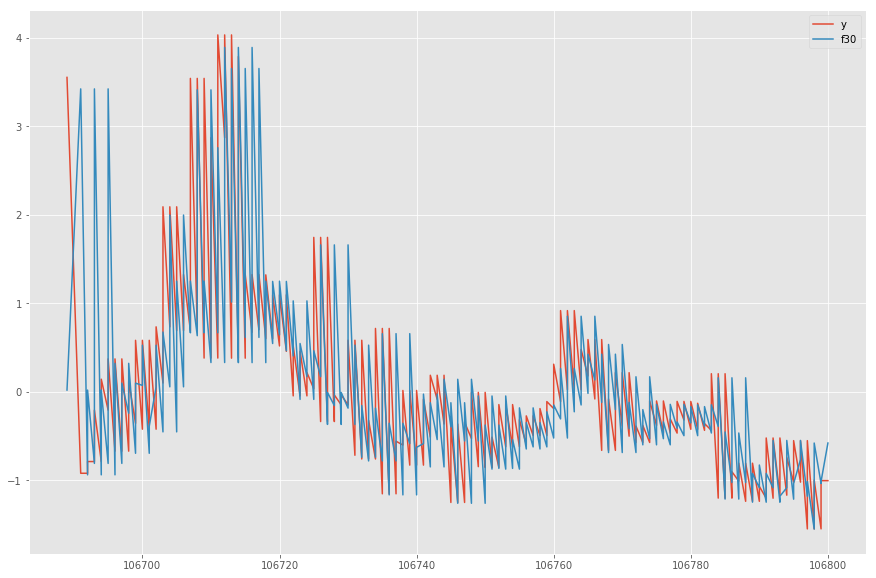

In [406]:

# get_reg_for_cluster(20441988)
for i in range(30,31):
    plt.figure(figsize=(15,10))
    print_claster(20441988,Train,'y')
    print_claster(20441988,Train,'f' + str(i))
    plt.legend()

In [365]:
# %%time
clasters = dict()
for x in np.unique(np.array(Test['item_id'])):
    clasters[x] = get_reg_for_cluster(x,Test)

In [317]:
def save_ans(_y_test, filename):
    ans = pd.DataFrame(data=np.matrix(_y_test).T, columns=['y'])
    ans = pd.concat((pd.DataFrame(Test['Num'],columns=['Num']),ans),axis=1)
    ans.to_csv(filename,index=None)

In [9]:
X_train = np.array(Train.drop('y',1))
y_train = np.array(Train['y'])
X_test = np.array(Test)

F = np.mean(X_train,axis=0)
S = np.std(X_train,axis=0)
X_train_norm  = (X_train - F)/S
X_test_norm = (X_test - F)/S

TEST_LEN_DEF = len(X_test)

In [11]:
def smape(y_pred,y_true):
    if len(y_pred) != len(y_true):
        raise Exception('bad lens')
    y_pred = np.array([max(0,x) for x in y_pred])
    y_true = np.array(y_true)
    return 100/len(y_pred)* np.sum(np.abs(y_pred - y_true)/(np.abs(y_pred) + np.abs(y_true))*2)

In [21]:
def pure_paralleled(clf_wrapper, params, X, y, metric, strips, i):
    s = strips[i]
    clf = clf_wrapper(**params)
    clf.fit(X[s[0]:s[1]],y[s[0]:s[1]])
    y_pred = clf.predict(X[s[2]:s[3]])
    return metric(y_pred, y[s[2]:s[3]])

def my_cv(clf_wrapper, params,  X, y, metric=smape, n_cv = 4, n_runs=4, n_train=None, n_test=None):
    res = []
    if n_train is None:
        n_train = max(len(X)//n_runs,TEST_LEN_DEF)
    if n_test is None:
        n_test = TEST_LEN_DEF
    strips = [] 
#     for t in range(n_cv):
#         s_train = sps.randint.rvs(low=0,high=len(X) - n_test - n_train)
#         f_train = s_train + n_train
#         s_test = sps.randint.rvs(low=f_train,high=len(X))
        
    defl = len(X)//(n_cv+1)
    for t in range(n_cv):
        s_train = 0
        f_train = defl*(t+1)
        s_test = f_train
        f_test = s_test + defl
        strips.append([s_train, f_train, s_test, f_test])
    print(strips)
        
    
    res = Parallel(n_jobs=n_runs)(delayed(pure_paralleled)(clf_wrapper, params, X, y, metric, strips, i) for i in range(n_cv))
    return res

In [22]:
def next(params, d, ar):
    cur = 0
    for key in d:
        if ar[cur] != len(d[key]) - 1:
            params[key] = d[key][ar[cur]+1]
            ar[cur] += 1
            return 0
        else:
            params[key] = d[key][0]
            ar[cur] = 0
        cur += 1
    return 1

def my_search_grid(tuned_parameters_series, default_keys,clf_wrapper, X, Y,n_cv=4,n_runs=4):

    best = np.inf
    best_p = {}

    for d in tuned_parameters_series:
        params = dict()
        ar = []
        for key in d:
            params[key] = d[key][0]
            ar.append(0)
        for key in default_keys:
            params[key] = default_keys[key]

        while True:
            res = my_cv(clf_wrapper, params,  X, Y, metric=smape, n_cv=n_cv, n_runs=n_runs, n_train=min(len(X),TEST_LEN_DEF*10))
            print(res, np.mean(res), np.std(res), np.std(res)/np.mean(res), params)
            print()
            if np.mean(res) < best:
                best = np.mean(res)
                best_p = copy.deepcopy(params)
            if next(params, d, ar):
                break
    return best, best_p

[106689 106691 106692 106693 106694 106695 106696 106697 106698 106699
 106700 106701 106702 106703 106704 106705 106706 106707 106708 106709
 106710 106711 106712 106713 106714 106715 106716 106717 106718 106719
 106720 106721 106722 106723 106724 106725 106726 106727 106728 106729
 106730 106731 106732 106733 106734 106735 106736 106737 106738 106739
 106740 106741 106742 106744 106745 106746 106747 106748 106749 106750
 106751 106752 106753 106754 106755 106756 106757 106758 106759 106760
 106761 106762 106763 106764 106765 106766 106767 106768 106769 106770
 106771 106772 106773 106774 106775 106776 106777 106778 106779 106780
 106781 106782 106783 106784 106785 106786 106787 106788 106789 106790
 106791 106792 106793 106794 106795 106796 106797] [340138 110776  70915 149741 203508 195400 120347 158134 139039 224751
 130197 130978 136408 172295 173432 141436 131322 179917 182912 128690
 179672 169438 252132 162155 121835 221498 204339 160360 178243 202063
 193745 177829 170252 1945

ValueError: Found input variables with inconsistent numbers of samples: [1, 27]

In [366]:
TimesTest = np.array(Test['year'])*53 + np.array(Test['week']) + np.array(Test['shift'])
Clastered = np.array(Test['item_id'])
Ansv = [clasters[Clastered[i]](TimesTest[i]) for i in range(len(TimesTest))]
y_test = [x for x in Ansv]
save_ans(y_test, 'prediction_with_strong_hack1')

In [ ]:
%%time

tuned_parameters_series = [{'criterion':['mse'],'splitter':['best'],'max_depth':[2,4,8,16,32]},
                            {'criterion':['mae'],'splitter':['best'],'max_depth':[2,4,8,16,32]},
                            {'criterion':['mse'],'splitter':['random'],'max_depth':[2,4,8,16,32]},
                            {'criterion':['mae'],'splitter':['random'],'max_depth':[2,4,8,16,32]},
                   ]

default_keys = {}# {'random_state':1}

# best, best_p = my_search_grid(tuned_parameters_series, default_keys, DecisionTreeRegressor, X_train, y_train,n_cv=8)
print(best, best_p)

Пока что, ничего особо не работает

In [121]:
%%time

tuned_parameters_series3 = [{'criterion':['mse'],'splitter':['best'],'max_depth':[2,3,4,5,6,7,8,9,10,16,32,64,128,256,512,1024]},

                   ]

default_keys3 ={}# {'random_state':1}

best3, best_p3 = my_search_grid(tuned_parameters_series3, default_keys3, DecisionTreeRegressor, X_train, y_train,n_cv=12)
print(best3, best_p3)

108.991692448 0.0461967426884 {'criterion': 'mse', 'splitter': 'best', 'max_depth': 2}
80.0063441605 0.146338318984 {'criterion': 'mse', 'splitter': 'best', 'max_depth': 3}
71.7005898355 0.102653821521 {'criterion': 'mse', 'splitter': 'best', 'max_depth': 4}
46.4634036252 0.0495723324481 {'criterion': 'mse', 'splitter': 'best', 'max_depth': 5}
46.7886459383 0.199405948019 {'criterion': 'mse', 'splitter': 'best', 'max_depth': 6}
37.4597797992 0.146448167968 {'criterion': 'mse', 'splitter': 'best', 'max_depth': 7}
34.2281387205 0.0581387045339 {'criterion': 'mse', 'splitter': 'best', 'max_depth': 8}
37.3348029197 0.0795733558992 {'criterion': 'mse', 'splitter': 'best', 'max_depth': 9}
36.8739693209 0.0787364046565 {'criterion': 'mse', 'splitter': 'best', 'max_depth': 10}
38.0291653461 0.347263947062 {'criterion': 'mse', 'splitter': 'best', 'max_depth': 16}
47.1853870738 0.124580772483 {'criterion': 'mse', 'splitter': 'best', 'max_depth': 32}
40.584123516 0.240535819399 {'criterion': 'mse

In [124]:
%%time

tuned_parameters_series = [{'criterion':['mae'],'splitter':['best'],'max_depth':[2,3,4,5,6,7,8,9,10,16,32,64,128,256,512,1024]},

                   ]

default_keys ={}# {'random_state':1}

best, best_p = my_search_grid(tuned_parameters_series, default_keys, DecisionTreeRegressor, X_train, y_train,n_cv=12)
print(best, best_p)

88.948656081 0.0828937490645 {'criterion': 'mae', 'splitter': 'best', 'max_depth': 2}
68.2798910611 0.164964864928 {'criterion': 'mae', 'splitter': 'best', 'max_depth': 3}
52.0384970051 0.287008855433 {'criterion': 'mae', 'splitter': 'best', 'max_depth': 4}
44.784964131 0.272755395973 {'criterion': 'mae', 'splitter': 'best', 'max_depth': 5}
40.0001370768 0.41016759424 {'criterion': 'mae', 'splitter': 'best', 'max_depth': 6}
34.6201865391 0.164721818197 {'criterion': 'mae', 'splitter': 'best', 'max_depth': 7}
48.831865565 0.429727009114 {'criterion': 'mae', 'splitter': 'best', 'max_depth': 8}
32.1715606023 0.117304869623 {'criterion': 'mae', 'splitter': 'best', 'max_depth': 9}
39.8102232086 0.441536555279 {'criterion': 'mae', 'splitter': 'best', 'max_depth': 10}
41.3818744849 0.24362608741 {'criterion': 'mae', 'splitter': 'best', 'max_depth': 16}
46.1949006585 0.209527017905 {'criterion': 'mae', 'splitter': 'best', 'max_depth': 32}
42.1350493305 0.145471414562 {'criterion': 'mae', 'spli

In [14]:
%%time

tuned_parameters_series = [{'n_features':[5,10,15,20],'n_partitions':[10,20,30,40],'max_depth':[7,8]},

                   ]

default_keys ={'err_f':smape}

best, best_p = my_search_grid(tuned_parameters_series, default_keys, DecisionTree, X_train, y_train,n_cv=4,n_runs=4)
print(best, best_p)

[[0, 14491, 14491, 28982], [0, 28982, 28982, 43473], [0, 43473, 43473, 57964], [0, 57964, 57964, 72455]]
[37.07684089960371, 37.465065455501929, 27.953220960109075, 41.864017192365708] 36.0897861269 5.05991866206 0.140203620057 {'n_features': 5, 'n_partitions': 10, 'max_depth': 7, 'err_f': <function smape at 0x118d55ae8>}
[[0, 14491, 14491, 28982], [0, 28982, 28982, 43473], [0, 43473, 43473, 57964], [0, 57964, 57964, 72455]]
[33.918705448220273, 35.434018707871154, 24.88738341193724, 38.143307155720358] 33.0958536809 4.97493395587 0.150318949432 {'n_features': 10, 'n_partitions': 10, 'max_depth': 7, 'err_f': <function smape at 0x118d55ae8>}
[[0, 14491, 14491, 28982], [0, 28982, 28982, 43473], [0, 43473, 43473, 57964], [0, 57964, 57964, 72455]]
[33.244875925654789, 35.398342924258571, 24.47849988828828, 37.083208671880783] 32.5512318525 4.85528059984 0.149158121629 {'n_features': 15, 'n_partitions': 10, 'max_depth': 7, 'err_f': <function smape at 0x118d55ae8>}
[[0, 14491, 14491, 28982],

KeyboardInterrupt: 

In [146]:
%%time
clf= DecisionTree(n_partitions=10, max_depth=8,err_f=smape)
clf.fit(X_train,y_train)
y_test = clf.predict(X_test)

CPU times: user 4min 4s, sys: 4.55 s, total: 4min 9s
Wall time: 4min 16s


In [190]:
print(y_test)

[   2416.18305598   11417.33333333  362966.68339768 ...,   11944.99319728
     411.70487365    6140.15839243]


In [202]:
ans = pd.DataFrame(data=np.matrix(y_test).T, columns=['y'])
ans = pd.concat((pd.DataFrame(Test['Num'],columns=['Num']),ans),axis=1)
ans.head()

,Num,y
0,348622,2416.183056
1,348623,11417.333333
2,348624,362966.683398
3,348625,41734.890323
4,348626,128.012048


In [203]:
ans.to_csv('my_DT_with_n_partitions=10,_max_depth=8,_err_f=smape',index=None)

некоторые логи:

[[0, 14491, 14491, 28982], [0, 28982, 28982, 43473], [0, 43473, 43473, 57964], [0, 57964, 57964, 72455]]
[35.575380682080585, 37.438222087783942, 26.670434279570195, 43.70524126832273] 35.8473195794 6.09440478288 0.170010055267 {'base_estimator': DecisionTree(err_f=<function smape at 0x118d55ae8>, max_depth=7, n_features=5,
       n_partitions=10), 'max_samples': 0.1, 'max_features': 0.1, 'n_estimators': 10, 'n_jobs': 4, 'random_state': 1}
[[0, 14491, 14491, 28982], [0, 28982, 28982, 43473], [0, 43473, 43473, 57964], [0, 57964, 57964, 72455]]
[35.572659303290436, 37.189723432292325, 26.270447264962133, 43.543790295028359] 35.6441550739 6.17787438991 0.173320825731 {'base_estimator': DecisionTree(err_f=<function smape at 0x118d55ae8>, max_depth=7, n_features=5,
       n_partitions=20), 'max_samples': 0.1, 'max_features': 0.1, 'n_estimators': 10, 'n_jobs': 4, 'random_state': 1}
[[0, 14491, 14491, 28982], [0, 28982, 28982, 43473], [0, 43473, 43473, 57964], [0, 57964, 57964, 72455]]
[34.930325026317369, 36.997682321714485, 26.224385169535278, 44.225791149082156] 35.5945459167 6.41693633776 0.180278640238 {'base_estimator': DecisionTree(err_f=<function smape at 0x118d55ae8>, max_depth=7,
       n_features=10, n_partitions=10), 'max_samples': 0.1, 'max_features': 0.1, 'n_estimators': 10, 'n_jobs': 4, 'random_state': 1}
[[0, 14491, 14491, 28982], [0, 28982, 28982, 43473], [0, 43473, 43473, 57964], [0, 57964, 57964, 72455]]
[34.928073711482682, 36.944403738995973, 26.10803869045272, 44.399328703787369] 35.5949612112 6.51506561618 0.18303336749 {'base_estimator': DecisionTree(err_f=<function smape at 0x118d55ae8>, max_depth=7,
       n_features=10, n_partitions=20), 'max_samples': 0.1, 'max_features': 0.1, 'n_estimators': 10, 'n_jobs': 4, 'random_state': 1}
[[0, 14491, 14491, 28982], [0, 28982, 28982, 43473], [0, 43473, 43473, 57964], [0, 57964, 57964, 72455]]
[34.159031475533517, 36.762596344149102, 26.36971476611717, 43.125021607079326] 35.1040910482 6.00558976038 0.171079483361 {'base_estimator': DecisionTree(err_f=<function smape at 0x118d55ae8>, max_depth=7, n_features=5,
       n_partitions=10), 'max_samples': 0.5, 'max_features': 0.1, 'n_estimators': 10, 'n_jobs': 4, 'random_state': 1}
[[0, 14491, 14491, 28982], [0, 28982, 28982, 43473], [0, 43473, 43473, 57964], [0, 57964, 57964, 72455]]
[34.455128151594693, 36.377773745603626, 26.25387137038458, 42.874816983801949] 34.9903975628 5.93089971109 0.169500780905 {'base_estimator': DecisionTree(err_f=<function smape at 0x118d55ae8>, max_depth=7, n_features=5,
       n_partitions=20), 'max_samples': 0.5, 'max_features': 0.1, 'n_estimators': 10, 'n_jobs': 4, 'random_state': 1}
[[0, 14491, 14491, 28982], [0, 28982, 28982, 43473], [0, 43473, 43473, 57964], [0, 57964, 57964, 72455]]
[34.096607033973747, 36.712548524172277, 26.106672850626282, 42.940042091819791] 34.9639676251 6.03902484215 0.172721382965 {'base_estimator': DecisionTree(err_f=<function smape at 0x118d55ae8>, max_depth=7,
       n_features=10, n_partitions=10), 'max_samples': 0.5, 'max_features': 0.1, 'n_estimators': 10, 'n_jobs': 4, 'random_state': 1}
[[0, 14491, 14491, 28982], [0, 28982, 28982, 43473], [0, 43473, 43473, 57964], [0, 57964, 57964, 72455]]
[33.766151903280715, 36.277811219066322, 26.001468801801852, 42.876663146206042] 34.7305237676 6.0390417063 0.173882828451 {'base_estimator': DecisionTree(err_f=<function smape at 0x118d55ae8>, max_depth=7,
       n_features=10, n_partitions=20), 'max_samples': 0.5, 'max_features': 0.1, 'n_estimators': 10, 'n_jobs': 4, 'random_state': 1}
[[0, 14491, 14491, 28982], [0, 28982, 28982, 43473], [0, 43473, 43473, 57964], [0, 57964, 57964, 72455]]
[33.186738246941957, 35.128892761522977, 24.5639114169159, 40.013153417650308] 33.2231739608 5.58389963505 0.16807243166 {'base_estimator': DecisionTree(err_f=<function smape at 0x118d55ae8>, max_depth=7, n_features=5,
       n_partitions=10), 'max_samples': 0.1, 'max_features': 0.5, 'n_estimators': 10, 'n_jobs': 4, 'random_state': 1}
[[0, 14491, 14491, 28982], [0, 28982, 28982, 43473], [0, 43473, 43473, 57964], [0, 57964, 57964, 72455]]
[34.854205141320257, 34.644368124110422, 24.383488063771257, 39.664830240221612] 33.3867228924 5.57243315191 0.166905663963 {'base_estimator': DecisionTree(err_f=<function smape at 0x118d55ae8>, max_depth=7, n_features=5,
       n_partitions=20), 'max_samples': 0.1, 'max_features': 0.5, 'n_estimators': 10, 'n_jobs': 4, 'random_state': 1}
[[0, 14491, 14491, 28982], [0, 28982, 28982, 43473], [0, 43473, 43473, 57964], [0, 57964, 57964, 72455]]
[32.874048759533522, 34.082556824802971, 23.92805924405512, 37.256343872547149] 32.0352521752 4.94675175679 0.154415883157 {'base_estimator': DecisionTree(err_f=<function smape at 0x118d55ae8>, max_depth=7,
       n_features=10, n_partitions=10), 'max_samples': 0.1, 'max_features': 0.5, 'n_estimators': 10, 'n_jobs': 4, 'random_state': 1}
[[0, 14491, 14491, 28982], [0, 28982, 28982, 43473], [0, 43473, 43473, 57964], [0, 57964, 57964, 72455]]
[32.443750837964188, 33.554222020016667, 23.712592133649942, 38.767862625374242] 32.1196069043 5.40926037705 0.168409918377 {'base_estimator': DecisionTree(err_f=<function smape at 0x118d55ae8>, max_depth=7,
       n_features=10, n_partitions=20), 'max_samples': 0.1, 'max_features': 0.5, 'n_estimators': 10, 'n_jobs': 4, 'random_state': 1}
[[0, 14491, 14491, 28982], [0, 28982, 28982, 43473], [0, 43473, 43473, 57964], [0, 57964, 57964, 72455]]
[33.51730762286585, 34.610728409634355, 23.94800492206527, 39.686275498897999] 32.9405791134 5.68974570516 0.172727555444 {'base_estimator': DecisionTree(err_f=<function smape at 0x118d55ae8>, max_depth=7, n_features=5,
       n_partitions=10), 'max_samples': 0.5, 'max_features': 0.5, 'n_estimators': 10, 'n_jobs': 4, 'random_state': 1}
[[0, 14491, 14491, 28982], [0, 28982, 28982, 43473], [0, 43473, 43473, 57964], [0, 57964, 57964, 72455]]
[33.327510517592039, 34.785108464770779, 24.128210080449268, 39.226539568716895] 32.8668421579 5.49320950592 0.167135299447 {'base_estimator': DecisionTree(err_f=<function smape at 0x118d55ae8>, max_depth=7, n_features=5,
       n_partitions=20), 'max_samples': 0.5, 'max_features': 0.5, 'n_estimators': 10, 'n_jobs': 4, 'random_state': 1}
[[0, 14491, 14491, 28982], [0, 28982, 28982, 43473], [0, 43473, 43473, 57964], [0, 57964, 57964, 72455]]
[31.62911658772347, 33.39589024200508, 23.038588973128853, 36.95644389940901] 31.2550099256 5.11710970543 0.163721263171 {'base_estimator': DecisionTree(err_f=<function smape at 0x118d55ae8>, max_depth=7,
       n_features=10, n_partitions=10), 'max_samples': 0.5, 'max_features': 0.5, 'n_estimators': 10, 'n_jobs': 4, 'random_state': 1}
[[0, 14491, 14491, 28982], [0, 28982, 28982, 43473], [0, 43473, 43473, 57964], [0, 57964, 57964, 72455]]
[31.960017510653081, 33.253121230248375, 22.97113518793666, 36.978461608147917] 31.2906838842 5.14453286964 0.164411007719 {'base_estimator': DecisionTree(err_f=<function smape at 0x118d55ae8>, max_depth=7,
       n_features=10, n_partitions=20), 'max_samples': 0.5, 'max_features': 0.5, 'n_estimators': 10, 'n_jobs': 4, 'random_state': 1}
[[0, 14491, 14491, 28982], [0, 28982, 28982, 43473], [0, 43473, 43473, 57964], [0, 57964, 57964, 72455]]
[35.326487767927809, 37.531270313572591, 26.718810387844652, 44.223538393689836] 35.9500267158 6.25610666694 0.174022309257 {'base_estimator': DecisionTree(err_f=<function smape at 0x118d55ae8>, max_depth=7, n_features=5,
       n_partitions=10), 'max_samples': 0.1, 'max_features': 0.1, 'n_estimators': 20, 'n_jobs': 4, 'random_state': 1}
[[0, 14491, 14491, 28982], [0, 28982, 28982, 43473], [0, 43473, 43473, 57964], [0, 57964, 57964, 72455]]
[34.949389595642572, 37.568899247435951, 26.497373271272664, 44.117043011870571] 35.7831762816 6.31592192346 0.176505346361 {'base_estimator': DecisionTree(err_f=<function smape at 0x118d55ae8>, max_depth=7, n_features=5,
       n_partitions=20), 'max_samples': 0.1, 'max_features': 0.1, 'n_estimators': 20, 'n_jobs': 4, 'random_state': 1}
[[0, 14491, 14491, 28982], [0, 28982, 28982, 43473], [0, 43473, 43473, 57964], [0, 57964, 57964, 72455]]

[[0, 14491, 14491, 28982], [0, 28982, 28982, 43473], [0, 43473, 43473, 57964], [0, 57964, 57964, 72455]]
[32.388065028804796, 33.5256168733981, 23.28371078068314, 37.981985110519041] 31.7948444484 5.34012148099 0.167955578133 {'base_estimator': DecisionTree(err_f=<function smape at 0x118d55ae8>, max_depth=7,
       n_features=10, n_partitions=10), 'n_estimators': 100, 'n_jobs': 4, 'random_state': 1, 'max_features': 0.5, 'max_samples': 0.5}

[[0, 14491, 14491, 28982], [0, 28982, 28982, 43473], [0, 43473, 43473, 57964], [0, 57964, 57964, 72455]]
[32.309047320792665, 33.329327673630758, 23.313941436804569, 37.490536903680791] 31.6107133337 5.1684150068 0.163502004913 {'base_estimator': DecisionTree(err_f=<function smape at 0x118d55ae8>, max_depth=7,
       n_features=10, n_partitions=20), 'n_estimators': 100, 'n_jobs': 4, 'random_state': 1, 'max_features': 0.5, 'max_samples': 0.5}

[[0, 14491, 14491, 28982], [0, 28982, 28982, 43473], [0, 43473, 43473, 57964], [0, 57964, 57964, 72455]]